# 1. Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
plt.rcParams["figure.facecolor"] = "white"

home_dir = "/gpfs/fs1/home/w/wind/batukan"
local_dir = f"{home_dir}/Documents/github/CIV1498/projects/project2"
github_dir = f"{home_dir}/Documents/github/CIV1498-Project2"

# 2. Import dataframe

In [2]:
df_LA_parcels_LAcity_cleaned_REV2 = pd.read_pickle(f"{github_dir}/dataframes/df_LA_parcels_LAcity_cleaned_REV2_MB.pkl", compression="gzip")

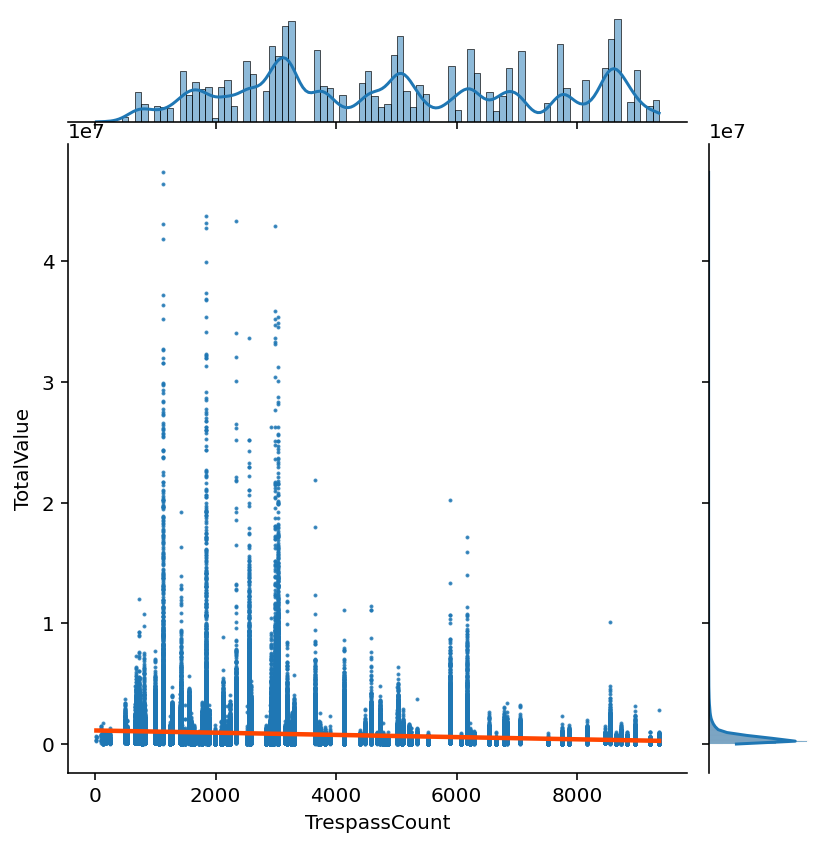

In [41]:
df = df_LA_parcels_LAcity_cleaned_REV2.merge(pd.read_csv(f"{github_dir}/dataset/neighbourhoods_crime_count_2010_to_2019.csv", index_col=0).drop(columns=["geometry"]).set_axis(["Neighborhood", "TrespassCount"], axis=1), on="Neighborhood", how="left")
sns.jointplot(x="TrespassCount", y="TotalValue", data=df, kind="reg", ratio=5, space=0.2, scatter_kws={"s": 1}, line_kws={"color": "orangered"})

# 3. See where parcels are located

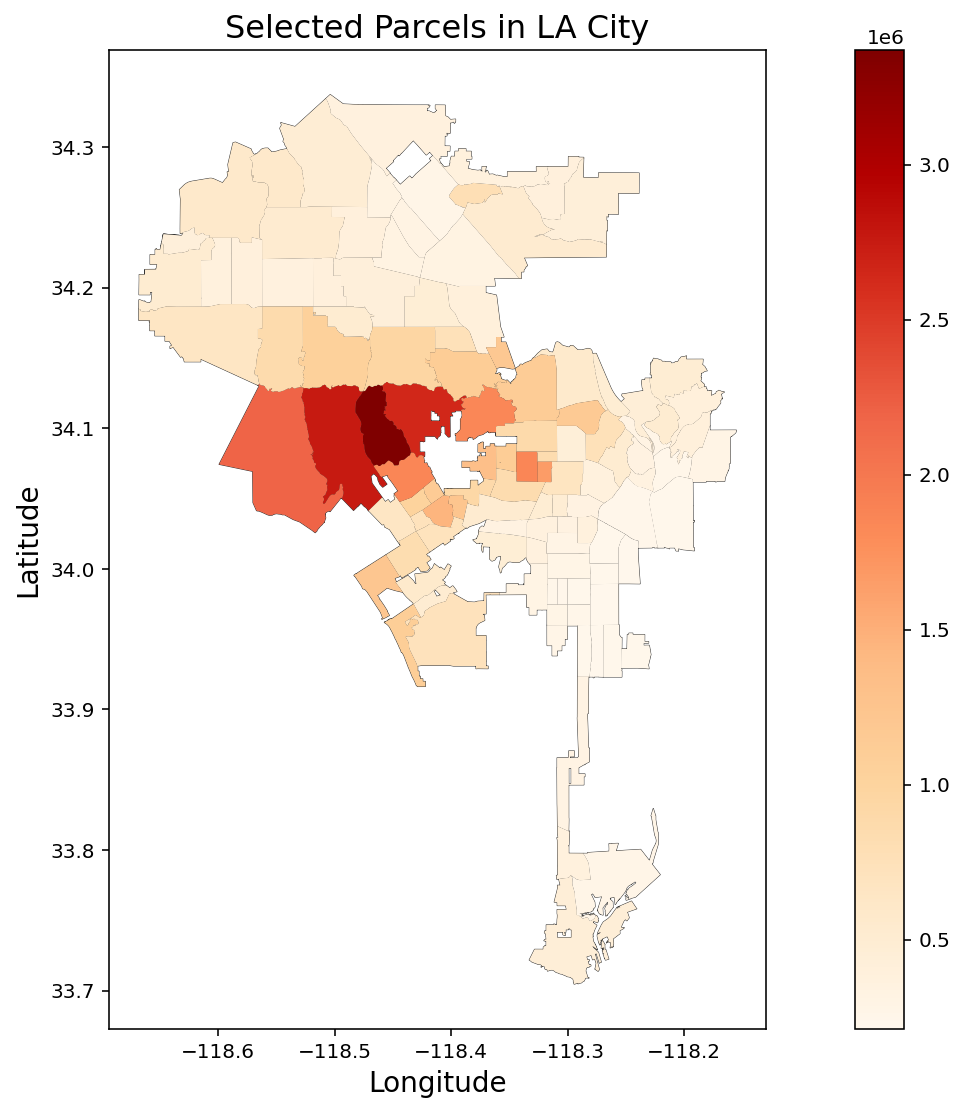

In [37]:
# Read shape file for neighborhoods in LA City
gdf_LA_city_neigborhoods = gpd.read_file(f"{local_dir}/geographic/cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shp")

# Plot neighborhood boundaries in LA City
ax = gdf_LA_city_neigborhoods.plot(figsize=(16, 9), categorical=True, linewidth=0.5, edgecolor="0.2", alpha=1.0, color="white", legend=False)

# Add parcels to the plot above
# gpd.GeoDataFrame(df_LA_parcels_LAcity_cleaned_REV2.groupby("Neighborhood").mean(), geometry="geometry").plot(ax=ax, categorical=False, column="TotalValue", cmap="OrRd", markersize=1, legend=True, **{"linewidth":2})
gdf_LA_city_neigborhoods.set_axis(["OBJECTID", "Neighborhood", "geometry"], axis=1).merge(df_LA_parcels_LAcity_cleaned_REV2.groupby("Neighborhood").mean().reset_index()[["TotalValue", "Neighborhood"]], how="left", on="Neighborhood").plot(ax=ax, categorical=False, column="TotalValue", cmap="OrRd", markersize=1, legend=True, **{"linewidth":2})

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14) 
plt.title("Selected Parcels in LA City", fontsize=16)
plt.savefig(f"{github_dir}/figures/MB/Selected_parcels_in_LAcity.png", dpi=600, bbox_inches="tight")

Text(0, 0.5, 'Inertia')

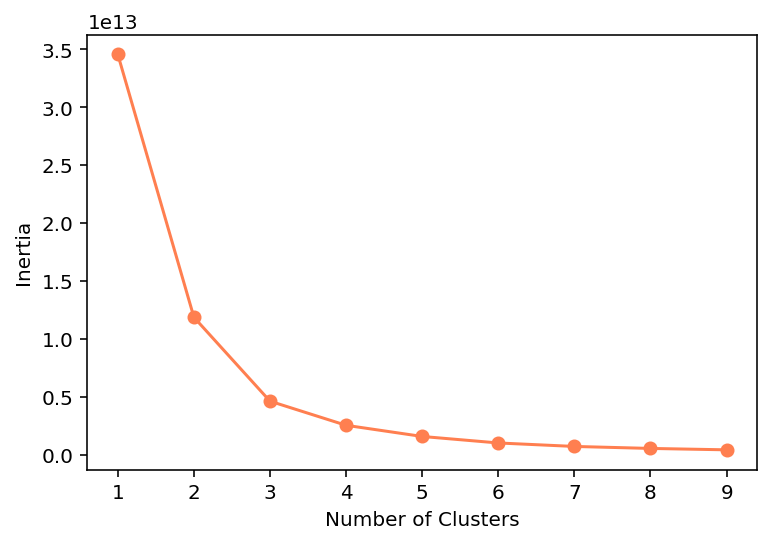

In [89]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_LA_parcels_LAcity_cleaned_REV2.groupby("Neighborhood").mean()["TotalValue"].to_numpy().reshape(-1,1))
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, "-o", color="coral")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")   

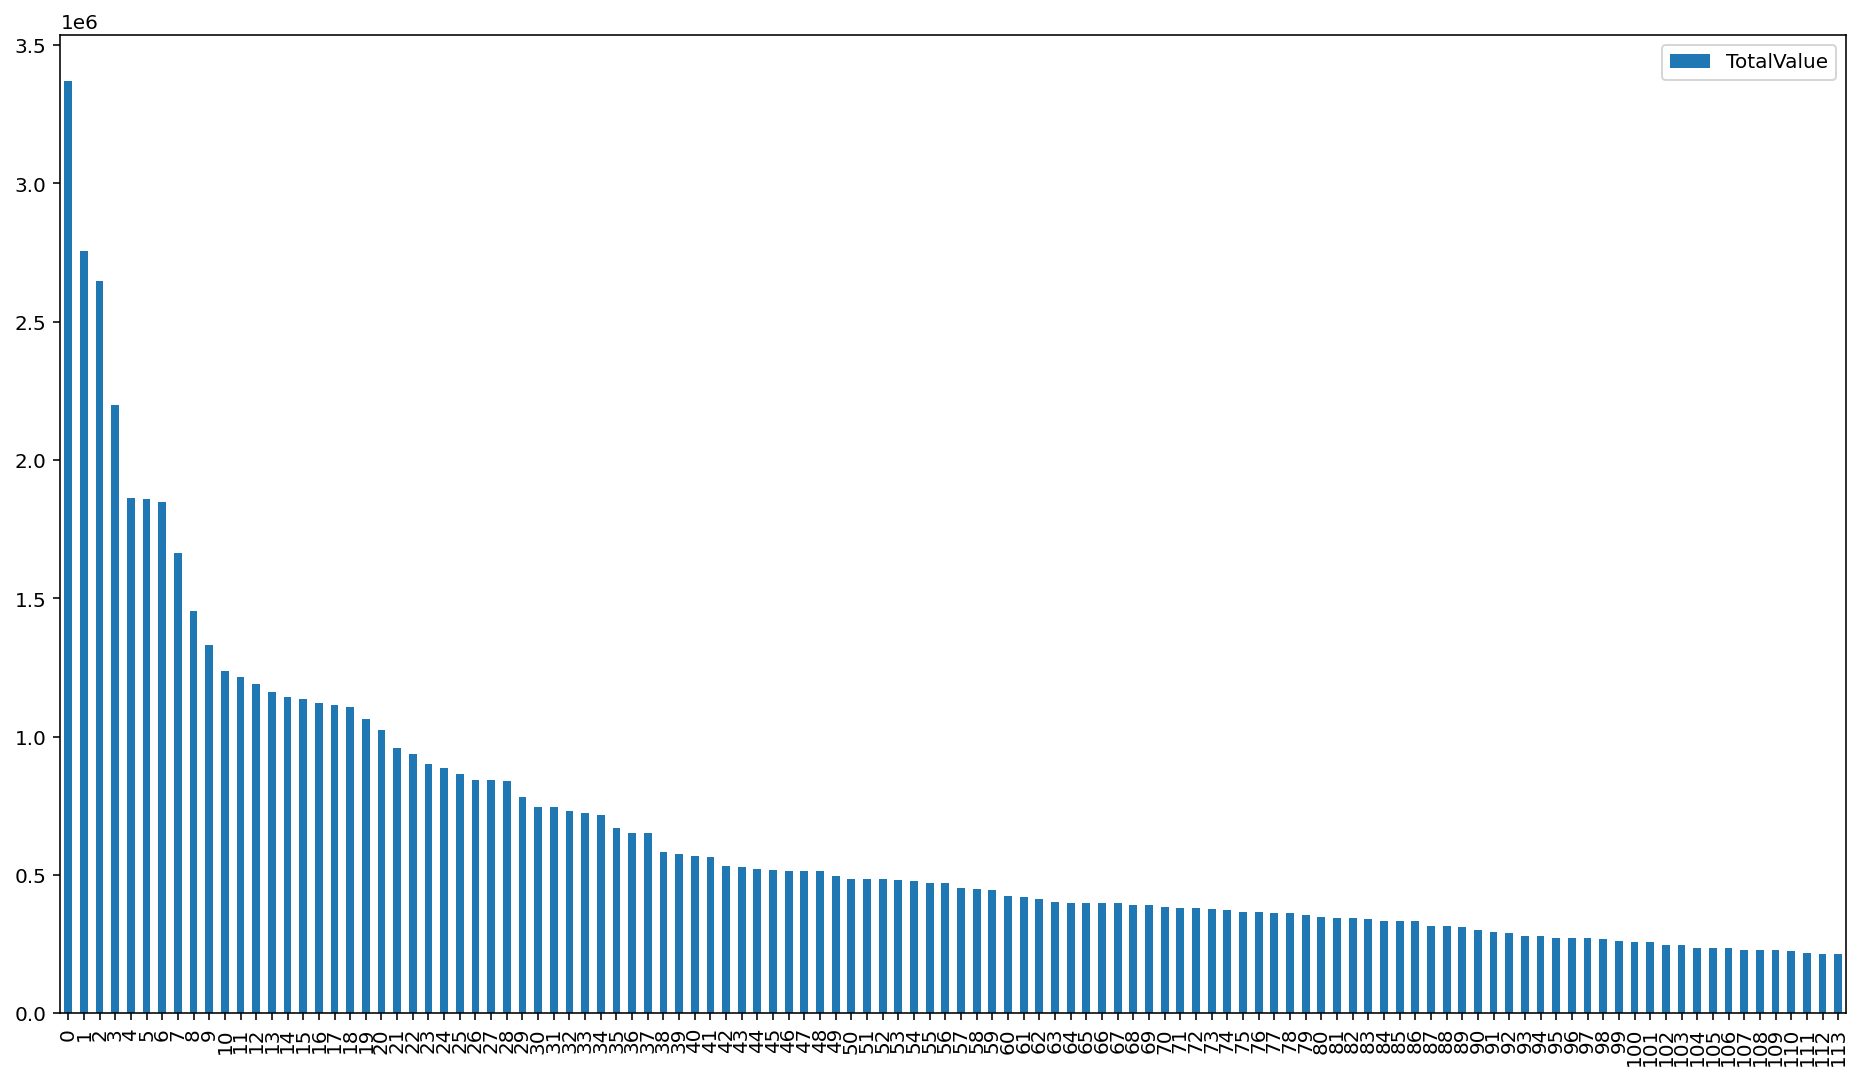

In [135]:
df_LA_parcels_LAcity_cleaned_REV2_cluster = df_LA_parcels_LAcity_cleaned_REV2.groupby("Neighborhood").mean().sort_values("TotalValue", ascending=False).reset_index()[["Neighborhood", "TotalValue"]]

df_LA_parcels_LAcity_cleaned_REV2_cluster.plot(kind="bar", figsize=(16, 9))

df_LA_parcels_LAcity_cleaned_REV2_cluster["cluster"] = np.nan
df_LA_parcels_LAcity_cleaned_REV2_cluster.loc[0:3, "cluster"] = "1"
df_LA_parcels_LAcity_cleaned_REV2_cluster.loc[3:8, "cluster"] = "2"
df_LA_parcels_LAcity_cleaned_REV2_cluster.loc[8:21, "cluster"] = "3"
df_LA_parcels_LAcity_cleaned_REV2_cluster.loc[21:, "cluster"] = "4"

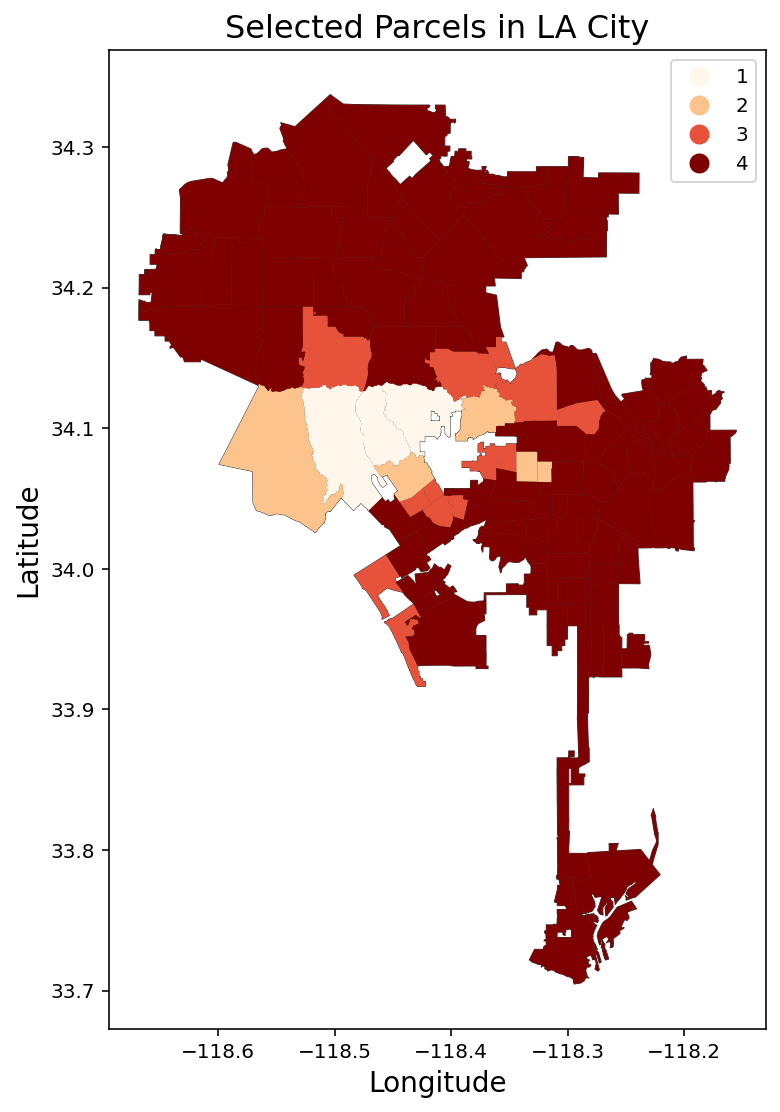

In [136]:
gdf_LA_city_neigborhoods = gpd.read_file(f"{local_dir}/geographic/cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shp")

# Plot neighborhood boundaries in LA City
ax = gdf_LA_city_neigborhoods.plot(figsize=(16, 9), categorical=True, linewidth=0.5, edgecolor="0.2", alpha=1.0, color="white", legend=False)

# Add parcels to the plot above
# gpd.GeoDataFrame(df_LA_parcels_LAcity_cleaned_REV2.groupby("Neighborhood").mean(), geometry="geometry").plot(ax=ax, categorical=False, column="TotalValue", cmap="OrRd", markersize=1, legend=True, **{"linewidth":2})
gdf_groupped = gdf_LA_city_neigborhoods.set_axis(["OBJECTID", "Neighborhood", "geometry"], axis=1).merge(df_LA_parcels_LAcity_cleaned_REV2.groupby("Neighborhood").mean().reset_index()[["TotalValue", "Neighborhood"]], how="left", on="Neighborhood").merge(df_LA_parcels_LAcity_cleaned_REV2_cluster, how="left", on="Neighborhood")

# gdf_groupped["cluster"] = kmeans.labels_.astype(str)
# gdf_groupped["cluster"] = ms.labels_.astype(str)
# gdf_groupped["cluster"] = gmm.predict(arr_cluster).astype(str)
# gdf_groupped["cluster"] = df_LA_parcels_LAcity_cleaned_REV2_cluster["cluster"]

gdf_groupped.plot(ax=ax, categorical=False, column="cluster", cmap="OrRd", markersize=1, legend=True, **{"linewidth":2})

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14) 
plt.title("Selected Parcels in LA City", fontsize=16)
plt.savefig(f"{github_dir}/figures/MB/Selected_parcels_in_LAcity.png", dpi=600, bbox_inches="tight")

In [138]:
df_LA_parcels_LAcity_cleaned_REV2_cluster.to_pickle(f"{github_dir}/dataframes/neighborhoods_cluster.pkl")

# 4. Read the whole dataset for exploratory data analysis

In [6]:
index_EDA = pd.read_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_LACity_index.pkl")

df_LA_parcels_AIN = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_AIN.pkl").loc[index_EDA]
# df_LA_parcels_LandValue = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_LandValue.pkl").loc[index_final]
# df_LA_parcels_LandValue["LandValue"] = df_LA_parcels_LandValue["LandValue"].str.replace(",", "").astype(float)
df_LA_parcels_RollYear = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_RollYear.pkl").loc[index_EDA]
df_LA_parcels_LandBaseYear = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_LandBaseYear.pkl").loc[index_EDA]
df_LA_parcels_TotalValue = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_TotalValue.pkl").loc[index_EDA]
df_LA_parcels_TotalValue["TotalValue"] = df_LA_parcels_TotalValue["TotalValue"].str.replace(",", "").astype(float)
df_LA_parcels_SQFTmain = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_SQFTmain.pkl").loc[index_EDA]
df_LA_parcels_SQFTmain["SQFTmain"] = df_LA_parcels_SQFTmain["SQFTmain"].str.replace(",", "").astype(float)
# df_LA_parcels_Bedrooms = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_Bedrooms.pkl").loc[index_final]
# df_LA_parcels_Bathrooms = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_Bathrooms.pkl").loc[index_final]
# df_LA_parcels_PropertyUseCode = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_PropertyUseCode.pkl").loc[index_final].astype(str)
# df_LA_parcels_YearBuilt = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_YearBuilt.pkl").loc[index_final]
# df_LA_parcels_EffectiveYearBuilt = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_EffectiveYearBuilt.pkl").loc[index_final]
# df_LA_parcels_TaxRateArea = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_TaxRateArea.pkl").loc[index_final]
# df_LA_parcels_Cluster = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_Cluster.pkl").loc[index_final]
# df_LA_parcels_ZIPcode = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_ZIPcode.pkl").loc[index_final]
# df_LA_parcels_ZIPcode[["ZIPcode5","ZIPcode4"]] = df_LA_parcels_ZIPcode["ZIPcode"].str.split('-', expand=True)
# df_LA_parcels_ZIPcode = df_LA_parcels_ZIPcode.drop(columns=["ZIPcode"]).astype({"ZIPcode5": "int64"})
# df_LAcity_parcels_closest_distance_BusSubway = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_closest_distance_BusSubway.pkl")
df_LAcity_parcels_neighborhood = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_neighborhood.pkl").merge(pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_AIN.pkl").loc[pd.read_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_closest_distance_BusSubway_index.pkl")], left_index=True, right_index=True)

parcel_boundaries_LA_cleaned = pd.read_pickle(f"{local_dir}/geographic/parcel_boundaries_LA_cleaned.pkl")

df_LAcity_parcels_EDA = pd.concat([df_LA_parcels_AIN,
                                   df_LA_parcels_RollYear,
                                   df_LA_parcels_SQFTmain,
                                   df_LA_parcels_TotalValue,
                                   df_LA_parcels_LandBaseYear
                                  ], axis=1).merge(df_LAcity_parcels_neighborhood, how="left", on="AIN")\
                                            .merge(parcel_boundaries_LA_cleaned, how="left", on="AIN")

df_LAcity_parcels_EDA = df_LAcity_parcels_EDA.dropna(subset=["Neighborhood"])
df_LAcity_parcels_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6986353 entries, 3464 to 10400126
Data columns (total 9 columns):
 #   Column        Dtype   
---  ------        -----   
 0   AIN           int64   
 1   RollYear      int64   
 2   SQFTmain      float64 
 3   TotalValue    float64 
 4   LandBaseYear  int64   
 5   Neighborhood  object  
 6   ShapeSTAre    float64 
 7   ShapeSTLen    float64 
 8   geometry      geometry
dtypes: float64(4), geometry(1), int64(3), object(1)
memory usage: 533.0+ MB


## 4.1. Compare Average Total Value for each year

In [ ]:
for selected_year in np.arange(2006, 2022, dtype=int):
        
    f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(40, 24))

    df_ax1 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["RollYear"] == selected_year].groupby("Neighborhood").agg({"TotalValue": "mean"}).sort_values(by="TotalValue", ascending=False).div(1e6).reset_index()
    df_ax1.plot(ax=ax1, kind="bar", x="Neighborhood", y="TotalValue", legend=False, color="darkgreen")

    index_ax1 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["RollYear"] == selected_year].groupby("Neighborhood").agg({"TotalValue": "mean"}).sort_values(by="TotalValue", ascending=False).index

    df_ax2 = df_LAcity_parcels_EDA[(df_LAcity_parcels_EDA["RollYear"] == selected_year) & (df_LAcity_parcels_EDA["LandBaseYear"] == selected_year)].groupby("Neighborhood").agg({"TotalValue": "mean"}).reindex(index_ax1).div(1e6).reset_index()

    df_ax2.plot(ax=ax2, kind="bar", x="Neighborhood", y="TotalValue", legend=False, color="green")

    df_ax3 = df_ax2.copy()
    df_ax3["TotalValue"] = df_ax3["TotalValue"] / df_ax1["TotalValue"]

    df_ax3.plot(ax=ax3, kind="bar", x="Neighborhood", y="TotalValue", legend=False, color="limegreen")

    df_ax4 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["RollYear"] == 2021].groupby("Neighborhood").agg({"AIN": "count"}).reindex(index_ax1).div(1e3).reset_index().set_axis(["Neighborhood", "Count"], axis=1)

    df_ax4.plot(ax=ax4, kind="bar", x="Neighborhood", y="Count", legend=False, color="steelblue")

    df_ax5 = df_LAcity_parcels_EDA[(df_LAcity_parcels_EDA["RollYear"] == 2021) & (df_LAcity_parcels_EDA["LandBaseYear"] == 2021)].groupby("Neighborhood").agg({"AIN": "count"}).reindex(index_ax1).div(1e3).reset_index().set_axis(["Neighborhood", "Count"], axis=1)

    df_ax5.plot(ax=ax5, kind="bar", x="Neighborhood", y="Count", legend=False, color="dodgerblue")

    df_ax6 = df_ax5.copy()
    df_ax6["Count"] = df_ax6["Count"] / df_ax4["Count"] * 100
    df_ax6.plot(ax=ax6, kind="bar", x="Neighborhood", y="Count", legend=False, color="deepskyblue")

    ax1.axhline(y=df_ax1["TotalValue"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax1["TotalValue"].mean()))
    ax2.axhline(y=df_ax2["TotalValue"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax2["TotalValue"].mean()))
    ax3.axhline(y=df_ax3["TotalValue"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax3["TotalValue"].mean()))
    ax4.axhline(y=df_ax4["Count"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax4["Count"].mean()))
    ax5.axhline(y=df_ax5["Count"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax5["Count"].mean()))
    ax6.axhline(y=df_ax6["Count"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax6["Count"].mean()))
    ax1.legend(loc="upper right")
    ax2.legend(loc="upper right")
    ax3.legend(loc="upper right")
    ax4.legend(loc="upper right")
    ax5.legend(loc="upper right")
    ax6.legend(loc="upper right")
    ax1.set_ylabel("Total Value (USD in Millions)")
    ax2.set_ylabel("Total Value (USD in Millions)")
    ax3.set_ylabel("Ratio of Total Value")
    ax4.set_ylabel("The Number of Parcels (Thousands)")
    ax5.set_ylabel("The Number of Parcels (Thousands)")
    ax6.set_ylabel("Percentage of Parels")

    ax1.set_title(f"Average Total Value of Parcels in LA City in {selected_year}")
    ax2.set_title(f"Average Total Value of Parcels in LA City Sold in {selected_year}")
    ax3.set_title(f"Ratio of Average Total Value to Average Total Value of Parcels Sold in {selected_year}")
    ax4.set_title(f"The Number of Parcels in LA City")
    ax5.set_title(f"The Number of Parcels in LA City Sold in {selected_year}")
    ax6.set_title(f"Percentage of Parcels Sold in {selected_year}");
    for ax in f.axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.savefig(f"{github_dir}/figures/MB/EDA/LA_city_parcels_overview_{selected_year}.png", dpi=300, bbox_inches="tight")

## 4.2. Average Total Value For Each Neighborhood

In [ ]:
for i, list_of_neighborhoods in enumerate(np.array_split(df_LAcity_parcels_EDA["Neighborhood"].unique(), 4)):
    nrows = len(list_of_neighborhoods)
    f, ax = plt.subplots(nrows=nrows, ncols=2, sharex=True, figsize=(12, 4))
    
    for j, neighborhood in enumerate(list_of_neighborhoods):

        df_ax1 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["Neighborhood"] == neighborhood].groupby("RollYear").agg({"TotalValue": "mean"}).div(1e6).reset_index()
        df_ax1.plot(kind="line", x="RollYear", y="TotalValue", legend=False, color="green", ax=ax[j, 0])

        df_ax2 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["Neighborhood"] == neighborhood].groupby("RollYear").agg({"AIN": "count"}).div(1e3).reset_index().set_axis(["RollYear", "Count"], axis=1)
        df_ax2.plot(kind="line", x="RollYear", y="Count", legend=False, color="dodgerblue", ax=ax[j, 1])

        ax[j, 0].axhline(y=df_ax1["TotalValue"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax1["TotalValue"].mean()))
        ax[j, 1].axhline(y=df_ax2["Count"].mean(), ls='--', color="red", label="Mean = {:.2f}".format(df_ax2["Count"].mean()))
        ax[j, 0].legend()
        ax[j, 1].legend()
        ax[j, 0].set_ylabel("Total Value (USD in Millions)")
        ax[j, 1].set_ylabel("The Number of Parcels Sold (Thousands)")
        ax[j, 0].set_xlabel("Roll Year")
        ax[j, 1].set_xlabel("Roll Year")
        ax[j, 0].set_title(f"Average Total Value of Parcels in {neighborhood}")
        ax[j, 1].set_title(f"The Number of Parcels in {neighborhood}")
        ax[j, 0].grid(axis="y")
        ax[j, 1].grid(axis="y")
    
    # f.suptitle(f"Selected Parcels in LA City")
    f.tight_layout()
    plt.savefig(f"{github_dir}/figures/MB/EDA/LA_city_parcels_overview_list_{i+1}.png", dpi=300, bbox_inches="tight")

# 4.3. Normalize each neighborhood

In [ ]:
df_LAcity_parcels_TotalValue = pd.DataFrame(index=np.sort(df_LAcity_parcels_EDA["RollYear"].unique()))
df_LAcity_parcels_TotalValueSold = pd.DataFrame(index=np.sort(df_LAcity_parcels_EDA["RollYear"].unique()))
df_LAcity_parcels_Count = pd.DataFrame(index=np.sort(df_LAcity_parcels_EDA["RollYear"].unique()))
df_LAcity_parcels_CountSold = pd.DataFrame(index=np.sort(df_LAcity_parcels_EDA["RollYear"].unique()))

for neighborhood in df_LAcity_parcels_EDA["Neighborhood"].unique():

    df_ax1 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["Neighborhood"] == neighborhood].groupby("RollYear").agg({"TotalValue": "mean"})
    df_LAcity_parcels_TotalValue[neighborhood] = df_ax1.sort_index(ascending=True)["TotalValue"]

    df_ax2 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["Neighborhood"] == neighborhood].groupby("RollYear").agg({"AIN": "count"}).reset_index().set_axis(["RollYear", "Count"], axis=1)
    df_LAcity_parcels_Count[neighborhood] = df_ax2.set_index("RollYear").sort_index(ascending=True)["Count"]

    arr_TotalValue = []
    arr_Count = []
    for year in np.arange(2006, 2022):
        arr_TotalValue.append(df_LAcity_parcels_EDA[(df_LAcity_parcels_EDA["Neighborhood"] == neighborhood) & (df_LAcity_parcels_EDA["LandBaseYear"] == year) & (df_LAcity_parcels_EDA["RollYear"] == year)]["TotalValue"].mean())
        
        arr_Count.append(df_LAcity_parcels_EDA[(df_LAcity_parcels_EDA["Neighborhood"] == neighborhood) & (df_LAcity_parcels_EDA["LandBaseYear"] == year) & (df_LAcity_parcels_EDA["RollYear"] == year)]["AIN"].count())
    
    df_LAcity_parcels_TotalValueSold[neighborhood] = np.array(arr_TotalValue)
    df_LAcity_parcels_CountSold[neighborhood] = np.array(arr_Count)

df_LAcity_parcels_TotalValue.to_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_TotalValue.pkl")
df_LAcity_parcels_TotalValueSold.to_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_TotalValueSold.pkl")
df_LAcity_parcels_Count.to_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_Count.pkl")
df_LAcity_parcels_CountSold.to_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_CountSold.pkl")

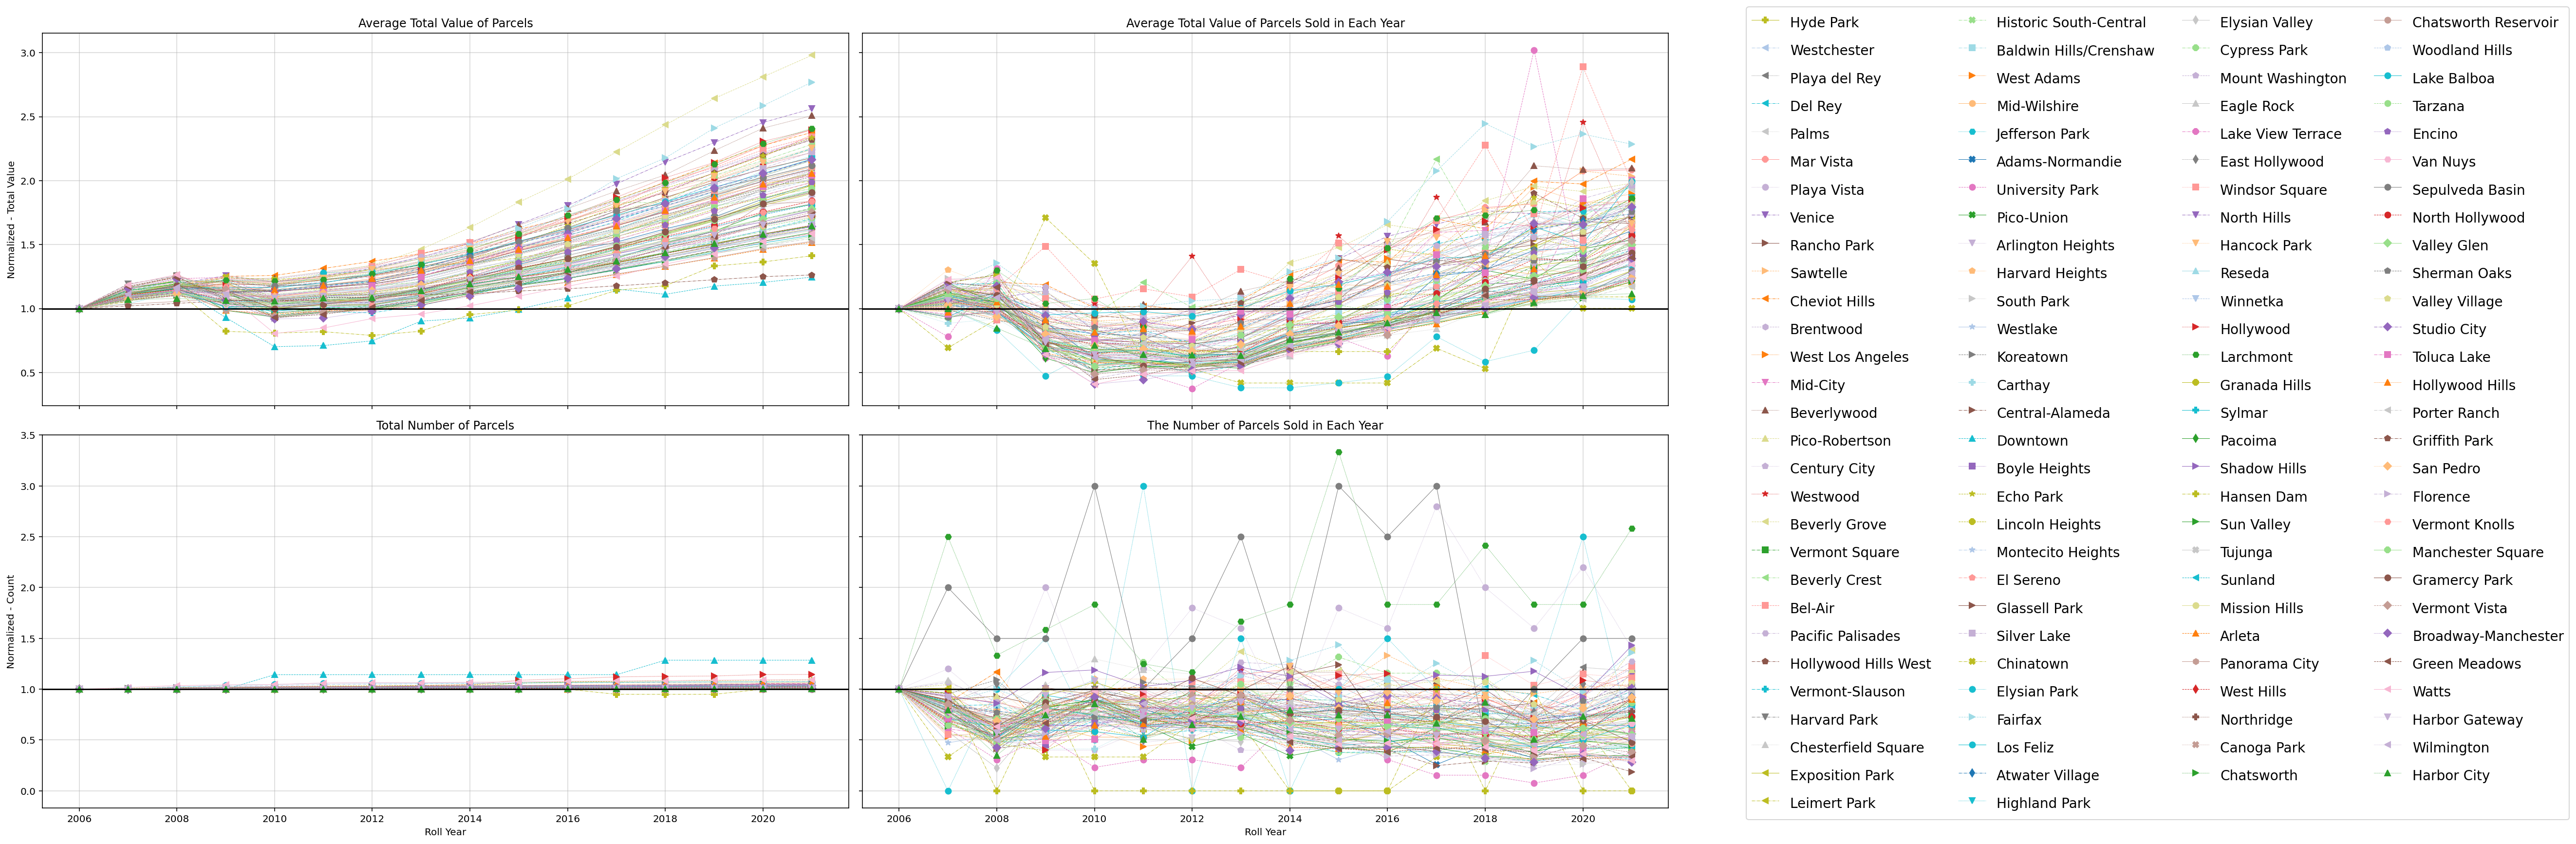

In [235]:
df_LAcity_parcels_TotalValue = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_TotalValue.pkl").fillna(method="ffill")
df_LAcity_parcels_TotalValueSold = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_TotalValueSold.pkl").fillna(method="ffill")
df_LAcity_parcels_Count = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_Count.pkl").fillna(method="ffill")
df_LAcity_parcels_CountSold = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_CountSold.pkl").fillna(method="ffill")

from matplotlib.cm import get_cmap

cmap = get_cmap("tab20")
colors = cmap.colors
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h',
           'H', 'D', 'd', 'P', 'X', 'o', 'v', '^', '<', '>']

linestyles = ['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--',
              ':', '-.', '-', '--', ':', '-.', '-', '--', ':', '-.']

f, ax = plt.subplots(nrows=2, ncols=2, sharex="col", sharey="row", figsize=(24, 12))
ax[0,0].set_title(f"Average Total Value of Parcels")
ax[1,0].set_title(f"Total Number of Parcels")
ax[0,1].set_title(f"Average Total Value of Parcels Sold in Each Year")
ax[1,1].set_title(f"The Number of Parcels Sold in Each Year")
ax[1,0].set_xlabel("Roll Year")
ax[1,1].set_xlabel("Roll Year")
ax[0,0].set_ylabel("Normalized - Total Value")
ax[1,0].set_ylabel("Normalized - Count")
ax[0,0].grid(True, alpha=0.5)
ax[0,1].grid(True, alpha=0.5)
ax[1,0].grid(True, alpha=0.5)
ax[1,1].grid(True, alpha=0.5)

for neighborhood in df_LAcity_parcels_TotalValue.columns:
    rand_color = np.random.randint(20, size=1)[0]
    rand_marker = np.random.randint(20, size=1)[0]
    rand_linestyle = np.random.randint(20, size=1)[0]

    ax[0,0].plot(df_LAcity_parcels_TotalValue.index, df_LAcity_parcels_TotalValue[neighborhood] / df_LAcity_parcels_TotalValue[neighborhood].iloc[0], label=neighborhood, color=colors[rand_color], marker=markers[rand_marker], linestyle=linestyles[rand_linestyle], linewidth=0.5)

    ax[1,0].plot(df_LAcity_parcels_Count.index, df_LAcity_parcels_Count[neighborhood] / df_LAcity_parcels_Count[neighborhood].iloc[0], label=neighborhood, color=colors[rand_color], marker=markers[rand_marker], linestyle=linestyles[rand_linestyle], linewidth=0.5)

    ax[0,1].plot(df_LAcity_parcels_TotalValueSold.index, df_LAcity_parcels_TotalValueSold[neighborhood] / df_LAcity_parcels_TotalValueSold[neighborhood].iloc[0], label=neighborhood, color=colors[rand_color], marker=markers[rand_marker], linestyle=linestyles[rand_linestyle], linewidth=0.5)

    ax[1,1].plot(df_LAcity_parcels_CountSold.index, df_LAcity_parcels_CountSold[neighborhood] / df_LAcity_parcels_CountSold[neighborhood].iloc[0], label=neighborhood, color=colors[rand_color], marker=markers[rand_marker], linestyle=linestyles[rand_linestyle], linewidth=0.5)
    
    ax[0,0].axhline(y=1, color="black")
    ax[0,1].axhline(y=1, color="black")
    ax[1,0].axhline(y=1, color="black")
    ax[1,1].axhline(y=1, color="black")


handles, labels = ax[0,1].get_legend_handles_labels()
f.legend(handles, labels, loc=2, fontsize=14, frameon=True, bbox_to_anchor=(1.04, 1), ncol=4, handleheight=2, borderaxespad=0)
f.tight_layout()
plt.savefig(f"{github_dir}/figures/MB/EDA/LA_city_parcels_normalized.png", dpi=300, bbox_inches="tight")

## 4.4. Plot the most recent average TotalValue for each neighborhood

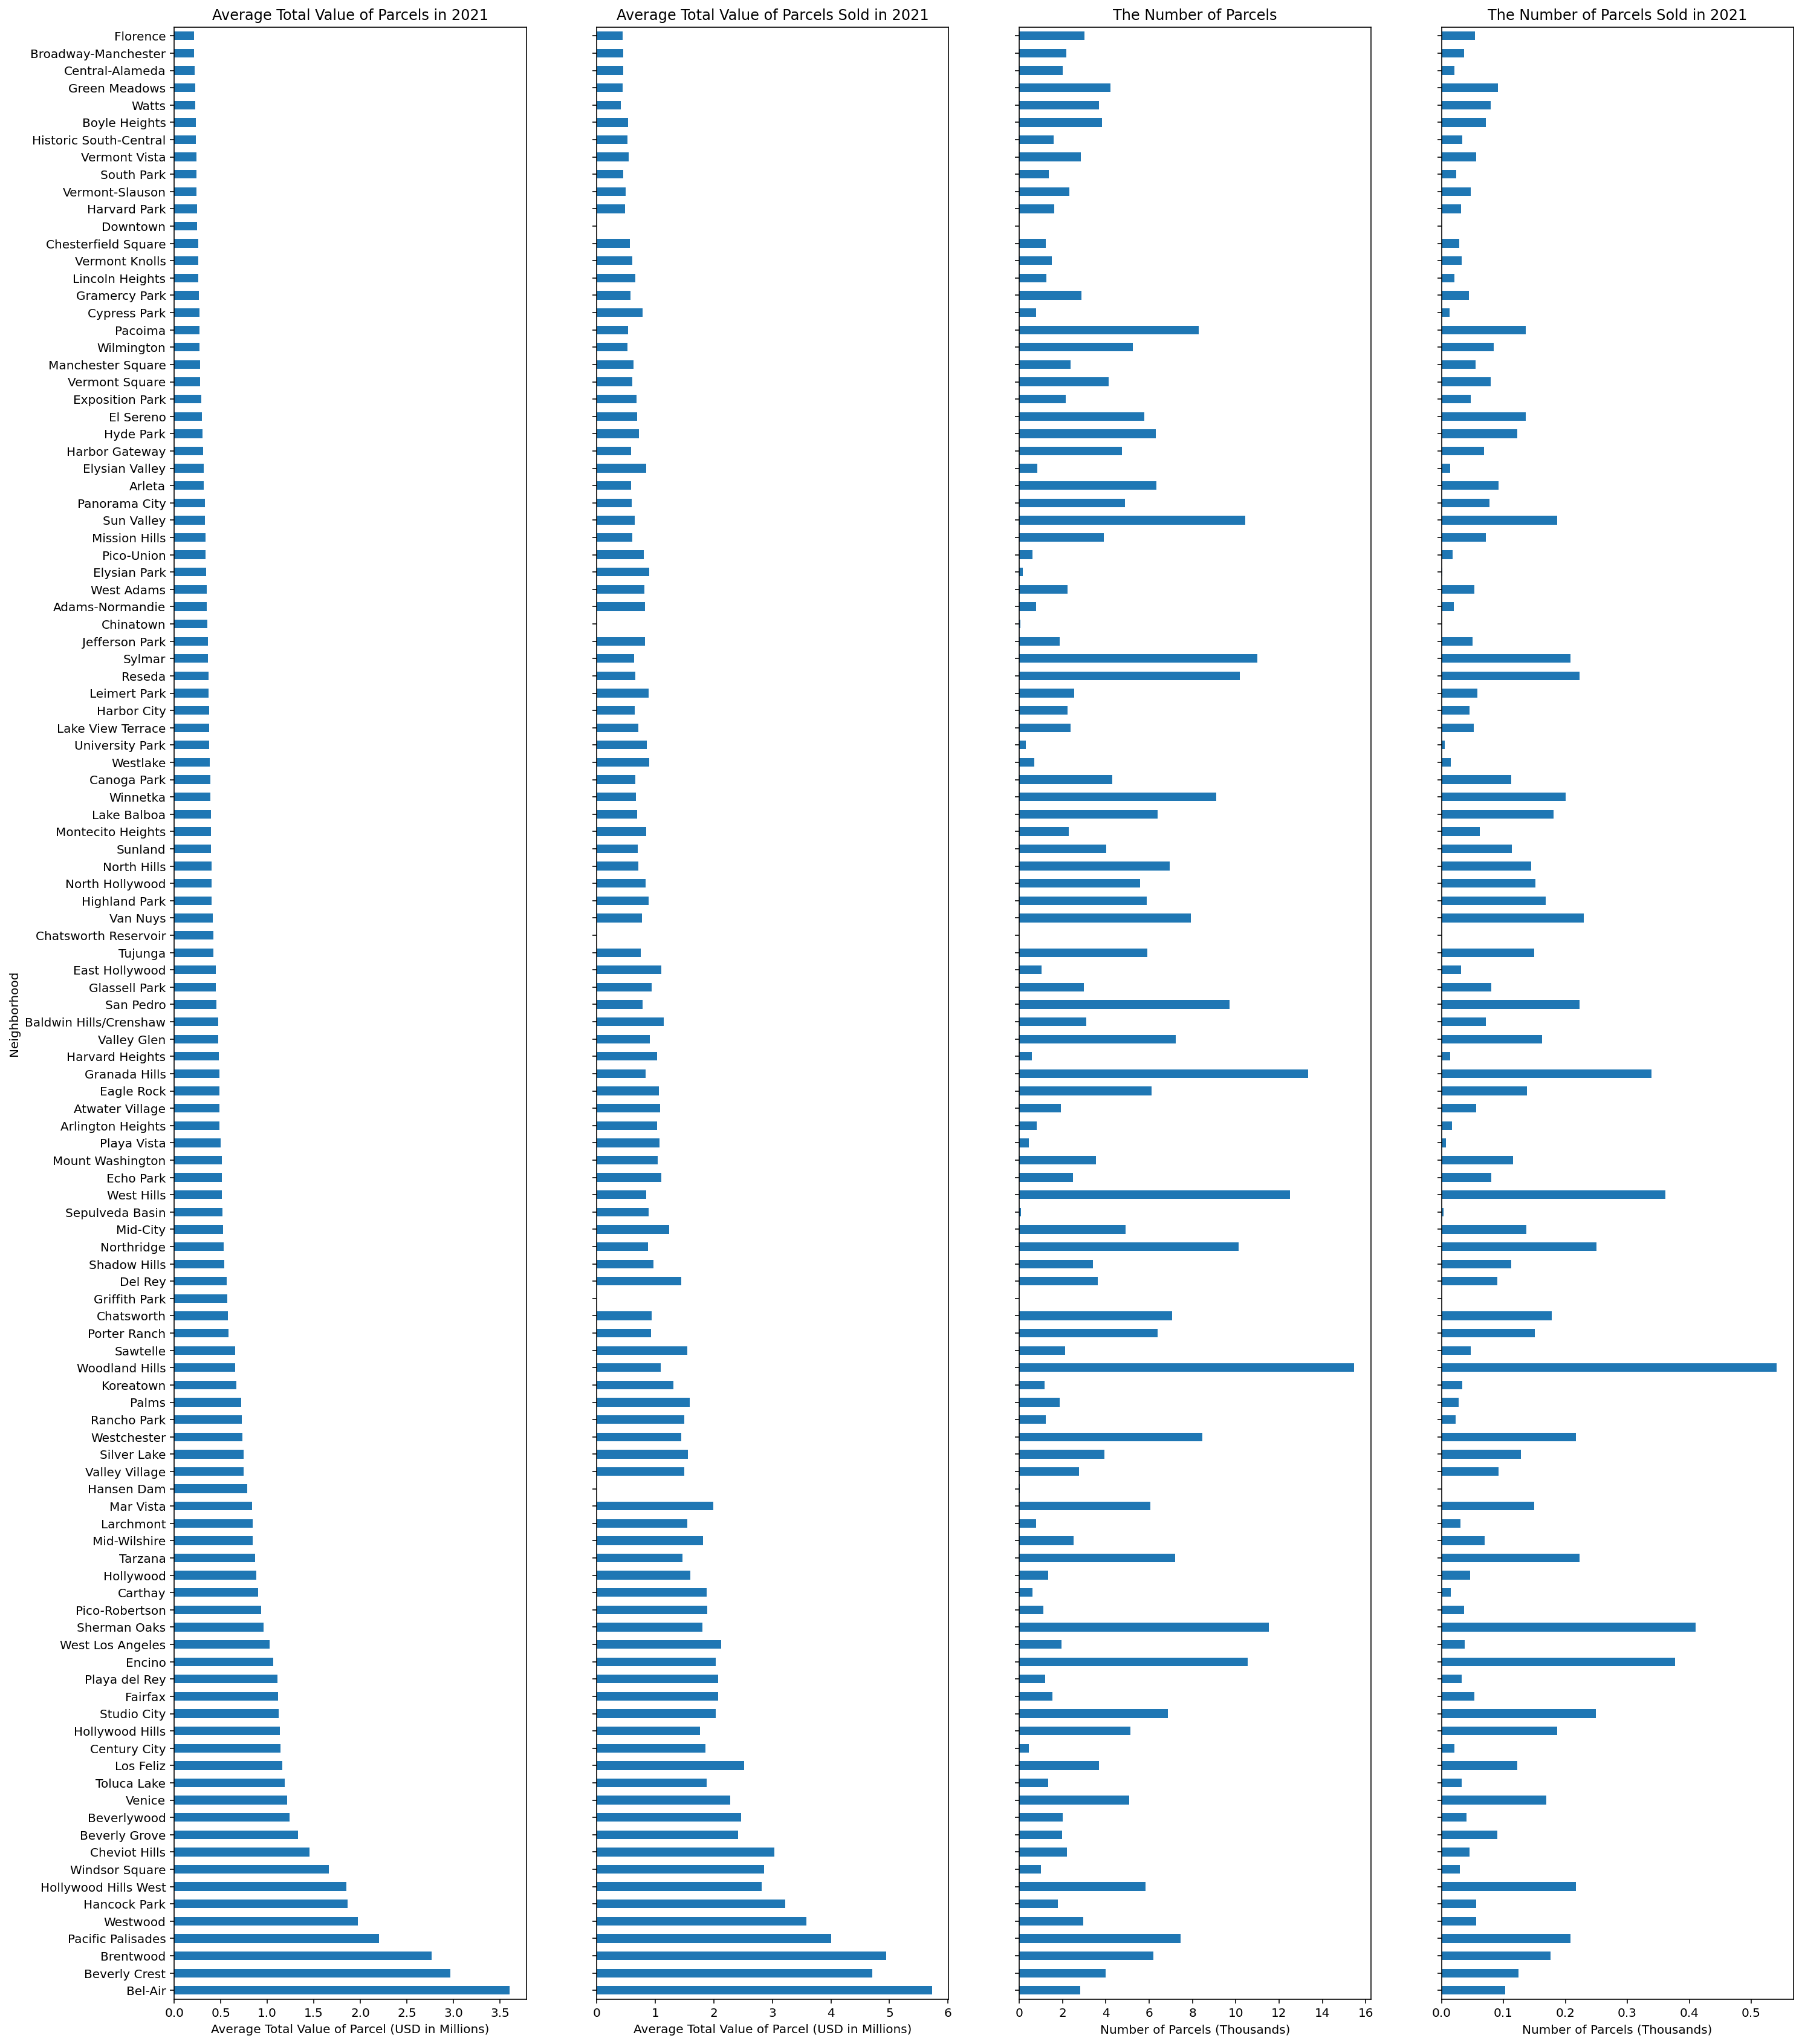

In [237]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(24,30))

df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["RollYear"] == 2021].groupby("Neighborhood").agg({"TotalValue": "mean"}).sort_values(by="TotalValue", ascending=False).div(1e6).reset_index().plot(ax=ax1, kind="barh", x="Neighborhood", y="TotalValue", legend=False)

index_ax1 = df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["RollYear"] == 2021].groupby("Neighborhood").agg({"TotalValue": "mean"}).sort_values(by="TotalValue", ascending=False).index

df_LAcity_parcels_EDA[(df_LAcity_parcels_EDA["RollYear"] == 2021) & (df_LAcity_parcels_EDA["LandBaseYear"] == 2021)].groupby("Neighborhood").agg({"TotalValue": "mean"}).reindex(index_ax1).div(1e6).reset_index().plot(ax=ax2, kind="barh", x="Neighborhood", y="TotalValue", legend=False)

df_LAcity_parcels_EDA[df_LAcity_parcels_EDA["RollYear"] == 2021].groupby("Neighborhood").agg({"AIN": "count"}).reindex(index_ax1).div(1e3).reset_index().plot(ax=ax3, kind="barh", x="Neighborhood", y="AIN", legend=False)

df_LAcity_parcels_EDA[(df_LAcity_parcels_EDA["RollYear"] == 2021) & (df_LAcity_parcels_EDA["LandBaseYear"] == 2021)].groupby("Neighborhood").agg({"AIN": "count"}).reindex(index_ax1).div(1e3).reset_index().plot(ax=ax4, kind="barh", x="Neighborhood", y="AIN", legend=False)

ax1.set_xlabel("Average Total Value of Parcel (USD in Millions)")
ax2.set_xlabel("Average Total Value of Parcel (USD in Millions)")
ax3.set_xlabel("Number of Parcels (Thousands)")
ax4.set_xlabel("Number of Parcels (Thousands)")
ax1.set_title("Average Total Value of Parcels in 2021")
ax2.set_title("Average Total Value of Parcels Sold in 2021")
ax3.set_title("The Number of Parcels")
ax4.set_title("The Number of Parcels Sold in 2021");
plt.savefig(f"{github_dir}/figures/MB/EDA/LA_city_parcels_2021_overview.png", dpi=300, bbox_inches="tight")